# The following code accompanies the blog post on the Empath analysis of hit country and R&B/hip-hop music lyrics

# Read the raw data & do some additional cleaning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# set the directory where the data are stored
in_dir = '/home/Data/'
# set the directory where the plots should be stored (optional)
# e.g. plot_out_dir = '/home/Data/plots/'
# raw data file is available in this Github repo: 
# https://github.com/methodmatters/scattertext_country_rb_hip_hop
raw_data_file_csv = 'country_rbhh_blog.csv'
# function to read the raw data
def read_raw_csv(in_dir_f, file_name_f):
    raw_data_df_f = pd.read_csv(in_dir_f + file_name_f)
    raw_data_df_f.fillna('', inplace=True)
    return raw_data_df_f
    



In [2]:
raw_data_df = read_raw_csv(in_dir, raw_data_file_csv)

In [3]:
# cleaning function:
def clean_raw_data(input_df):
    text_cols = ['lyrics', 'lyrics_clean', 'lyrics_scrubbed']
    # remove weird html things
    for col in text_cols:
        input_df[col] = input_df[col].str.replace('\u200E', '')
        input_df[col] = input_df[col].str.replace("’", "'")
        input_df[col] = input_df[col].str.replace('…', '')
        input_df[col] = input_df[col].str.replace("Â€~", '')
        input_df[col] = input_df[col].str.replace("repeat chorus", '', case = False)
        input_df[col] = input_df[col].str.replace("instrumental", '', case = False)
    print(input_df.shape)
    # remove duplicates on song and artist
    input_df.drop_duplicates(subset = ['song', 'artist'], ignore_index = True, inplace = True)
    # specify columns to keep:
    cols_to_keep = ['song', 'artist', 'genre', 'lyrics_clean', 'lyrics_scrubbed']
    input_df = input_df[cols_to_keep]
    print(input_df.shape)
    return(input_df)
        

In [4]:
clean_df = clean_raw_data(raw_data_df)
clean_df.shape

(5198, 9)
(4620, 5)


(4620, 5)

In [5]:
# delete the original uncleaned file
del(raw_data_df)

In [6]:
clean_df.head()

,song,artist,genre,lyrics_clean,lyrics_scrubbed
0,Nobody's Home,Clint Black,Country,Move slowly to my dresser drawers Put my blue ...,slowly dresser drawers blue jeans cowboy boots...
1,Hard Rock Bottom Of Your Heart,Randy Travis,Country,Since the day I was led to temptation And in w...,day led temptation weakness love prayed time c...
2,On Second Thought,Eddie Rabbitt,Country,Sometimes a man does things without half think...,man things half thinking understand called nam...
3,"Love Without End, Amen",George Strait,Country,I got sent home from school one day with a shi...,school day shiner eye fighting rules matter da...
4,Walkin' Away,Clint Black,Country,Walkin' away I saw a side of you That I knew w...,walkin knew someday goodbye wrong start differ...


# Analysis with Empath

In [7]:
from empath import Empath
lexicon = Empath()


## Empath Examp|le

In [8]:
empath_example = lexicon.analyze("he hit the other person", normalize=True)
empath_example

{'help': 0.0,
 'office': 0.0,
 'dance': 0.0,
 'money': 0.0,
 'wedding': 0.0,
 'domestic_work': 0.0,
 'sleep': 0.0,
 'medical_emergency': 0.0,
 'cold': 0.0,
 'hate': 0.0,
 'cheerfulness': 0.0,
 'aggression': 0.0,
 'occupation': 0.0,
 'envy': 0.0,
 'anticipation': 0.0,
 'family': 0.0,
 'vacation': 0.0,
 'crime': 0.0,
 'attractive': 0.0,
 'masculine': 0.0,
 'prison': 0.0,
 'health': 0.0,
 'pride': 0.0,
 'dispute': 0.0,
 'nervousness': 0.0,
 'government': 0.0,
 'weakness': 0.0,
 'horror': 0.0,
 'swearing_terms': 0.0,
 'leisure': 0.0,
 'suffering': 0.0,
 'royalty': 0.0,
 'wealthy': 0.0,
 'tourism': 0.0,
 'furniture': 0.0,
 'school': 0.0,
 'magic': 0.0,
 'beach': 0.0,
 'journalism': 0.0,
 'morning': 0.0,
 'banking': 0.0,
 'social_media': 0.0,
 'exercise': 0.0,
 'night': 0.0,
 'kill': 0.0,
 'blue_collar_job': 0.0,
 'art': 0.0,
 'ridicule': 0.0,
 'play': 0.0,
 'computer': 0.0,
 'college': 0.0,
 'optimism': 0.0,
 'stealing': 0.0,
 'real_estate': 0.0,
 'home': 0.0,
 'divine': 0.0,
 'sexual': 0.0

In [9]:
len(empath_example)

194

In [10]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
for w in sorted(empath_example, key=empath_example.get, reverse=True):
    print(w, empath_example[w])

movement 0.2
violence 0.2
pain 0.2
negative_emotion 0.2
help 0.0
office 0.0
dance 0.0
money 0.0
wedding 0.0
domestic_work 0.0
sleep 0.0
medical_emergency 0.0
cold 0.0
hate 0.0
cheerfulness 0.0
aggression 0.0
occupation 0.0
envy 0.0
anticipation 0.0
family 0.0
vacation 0.0
crime 0.0
attractive 0.0
masculine 0.0
prison 0.0
health 0.0
pride 0.0
dispute 0.0
nervousness 0.0
government 0.0
weakness 0.0
horror 0.0
swearing_terms 0.0
leisure 0.0
suffering 0.0
royalty 0.0
wealthy 0.0
tourism 0.0
furniture 0.0
school 0.0
magic 0.0
beach 0.0
journalism 0.0
morning 0.0
banking 0.0
social_media 0.0
exercise 0.0
night 0.0
kill 0.0
blue_collar_job 0.0
art 0.0
ridicule 0.0
play 0.0
computer 0.0
college 0.0
optimism 0.0
stealing 0.0
real_estate 0.0
home 0.0
divine 0.0
sexual 0.0
fear 0.0
irritability 0.0
superhero 0.0
business 0.0
driving 0.0
pet 0.0
childish 0.0
cooking 0.0
exasperation 0.0
religion 0.0
hipster 0.0
internet 0.0
surprise 0.0
reading 0.0
worship 0.0
leader 0.0
independence 0.0
body 0.0


## Extract Linguistic Categories from the Song Lyrics Texts

In [11]:
%%time
empath_analysis = [lexicon.analyze(x, normalize=True) for x in clean_df.lyrics_clean]

CPU times: user 25.5 s, sys: 30.4 ms, total: 25.6 s
Wall time: 25.6 s


In [12]:
len(empath_analysis)

4620

In [13]:
empath_perc = pd.DataFrame(empath_analysis) * 100
empath_perc.iloc[:, 0:5].head()

,help,office,dance,money,wedding
0,0.0,0.0,0.000000,1.363636,0.000000
1,0.0,0.0,3.053435,0.000000,0.000000
2,0.0,0.0,0.829876,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.353357
4,0.0,0.0,0.000000,0.000000,0.617284


In [14]:
empath_perc.shape

(4620, 194)

# Prepare Data for Visualization

## Merge Linguistic Categories Into Master Data & Aggregate by Genre

In [15]:
master_empath_df = pd.concat([clean_df, empath_perc], axis = 1)
master_empath_df.shape

(4620, 199)

In [16]:
master_empath_df.dtypes

song                 object
artist               object
genre                object
lyrics_clean         object
lyrics_scrubbed      object
                     ...   
contentment         float64
writing             float64
rural               float64
positive_emotion    float64
musical             float64
Length: 199, dtype: object

In [17]:
master_empath_df.head()

,song,artist,genre,lyrics_clean,lyrics_scrubbed,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,banking,social_media,exercise,night,kill,blue_collar_job,art,ridicule,play,computer,college,optimism,stealing,real_estate,home,divine,sexual,fear,irritability,superhero,business,driving,pet,childish,cooking,exasperation,religion,hipster,internet,surprise,reading,worship,leader,independence,movement,body,noise,eating,medieval,zest,confusion,water,sports,death,healing,legend,heroic,celebration,restaurant,violence,programming,dominant_heirarchical,military,neglect,swimming,exotic,love,hiking,communication,hearing,order,sympathy,hygiene,weather,anonymity,trust,ancient,deception,fabric,air_travel,fight,dominant_personality,music,vehicle,politeness,toy,farming,meeting,war,speaking,listen,urban,shopping,disgust,fire,tool,phone,gain,sound,injury,sailing,rage,science,work,appearance,valuable,warmth,youth,sadness,fun,emotional,joy,affection,traveling,fashion,ugliness,lust,shame,torment,economics,anger,politics,ship,clothing,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,Nobody's Home,Clint Black,Country,Move slowly to my dresser drawers Put my blue ...,slowly dresser drawers blue jeans cowboy boots...,0.0,0.0,0.000000,1.363636,0.000000,1.818182,0.909091,0.0,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000,1.818182,0.909091,0.0,0.000000,1.818182,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.454545,0.000000,0.0,0.0,0.0,0.454545,0.909091,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.000000,0.000000,0.0,0.0,2.272727,0.0,0.0,0.000000,0.000000,0.0,0.000000,3.181818,0.000000,0.0,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.363636,0.0,0.454545,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.454545,0.0,0.0,0.0,0.909091,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.818182,0.000000,0.0,0.454545,1.363636,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.181818,0.0,0.0,0.454545,0.000000,0.0,0.000000,0.000000,0.454545,0.909091,0.0,0.000000,0.0,0.454545,0.0,0.0,0.454545,0.0,0.0,0.0,0.000000,1.363636,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.454545,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,3.181818,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.909091,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.909091,0.0,0.0,0.454545,0.0,0.000000,0.909091,0.0,0.0,0.454545,0.909091,0.0,0.454545,0.0,0.454545,0.000000,0.000000,0.0,0.0,0.454545,0.000000
1,Hard Rock Bottom Of Your Heart,Randy Travis,Country,Since the day I was led to temptation And in w...,day led temptation weakness love prayed time c...,0.0,0.0,3.053435,0.000000,0.000000,0.381679,0.000000,0.0,1.526718,0.0,0.0,0.0,0.0,0.381679,0.000000,0.381679,0.000000,0.0,0.381679,0.000000,0.0,0.0,0.0,0.381679,1.145038,0.0,0.381679,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.763359,0.0,0.0,0.381679,0.0,0.0,0.381679,0.000000,0.0,0.381679,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.526718,0.0,0.000000,0.0,0.381679,0.000000,0.0,0.000000,0.000000,1.526718,0.0,0.0,0.0,0.000000,1.145038,0.0,0.0,0.0,0.0,0.0,0.0,2.290076,0.0,0.381679,0.381679,0.000000,0.381679,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.053435,0.000

## Aggregate the Empath Linguistic Categories by Genre

In [18]:
cols_to_agg = [x for x in master_empath_df.columns if x not in ['song', 'artist', 'lyrics_clean', 'lyrics_scrubbed']]
cols_to_agg[0:10]

['genre',
 'help',
 'office',
 'dance',
 'money',
 'wedding',
 'domestic_work',
 'sleep',
 'medical_emergency',
 'cold']

In [19]:
agg_df = master_empath_df[cols_to_agg].groupby('genre').mean().reset_index(drop = False)
agg_df.shape

(2, 195)

In [20]:
agg_df.head()

,genre,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,banking,social_media,exercise,night,kill,blue_collar_job,art,ridicule,play,computer,college,optimism,stealing,real_estate,home,divine,sexual,fear,irritability,superhero,business,driving,pet,childish,cooking,exasperation,religion,hipster,internet,surprise,reading,worship,leader,independence,movement,body,noise,eating,medieval,zest,confusion,water,sports,death,healing,legend,heroic,celebration,restaurant,violence,programming,dominant_heirarchical,military,neglect,swimming,exotic,love,hiking,communication,hearing,order,sympathy,hygiene,weather,anonymity,trust,ancient,deception,fabric,air_travel,fight,dominant_personality,music,vehicle,politeness,toy,farming,meeting,war,speaking,listen,urban,shopping,disgust,fire,tool,phone,gain,sound,injury,sailing,rage,science,work,appearance,valuable,warmth,youth,sadness,fun,emotional,joy,affection,traveling,fashion,ugliness,lust,shame,torment,economics,anger,politics,ship,clothing,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,Country,0.115607,0.055725,0.318444,0.252351,0.222713,0.259330,0.394744,0.048475,0.329031,0.173631,0.064749,0.103472,0.040366,0.056036,0.01357,0.603035,0.574274,0.048677,0.215530,0.292755,0.054336,0.028551,0.045581,0.113063,0.253301,0.011526,0.076282,0.056251,0.139242,0.150747,0.378036,0.038577,0.044499,0.024363,0.137186,0.071829,0.037618,0.206440,0.022086,0.161269,0.095060,0.078565,0.054736,0.603739,0.122411,0.021176,0.239406,0.034294,0.259229,0.023324,0.048096,0.887511,0.031647,0.184760,0.494649,0.278727,0.116305,0.184976,0.007436,0.006134,0.279729,0.529086,0.098402,0.734767,0.068975,0.009937,0.073027,0.078678,0.023227,0.025103,0.081380,0.109675,0.029573,0.002283,0.612903,0.551435,0.169040,0.143540,0.009820,0.078914,0.086456,0.222789,0.153576,0.337312,0.226076,0.025139,0.171357,0.235539,0.115466,0.461326,0.007385,0.004509,0.019367,0.022597,0.126949,0.065142,0.973162,0.098821,0.435096,0.445209,0.152085,0.070935,0.060373,0.434638,0.001359,0.370626,0.161797,0.180663,0.091081,0.108678,0.12502,0.021767,0.542357,0.425445,0.019641,0.177432,0.062998,0.096212,0.069097,0.703805,0.658675,0.044085,0.190131,0.030181,0.251349,0.027772,0.324316,0.048901,0.233208,0.395482,0.176547,0.018218,0.018612,0.116139,0.220001,0.092584,0.237384,0.556620,0.174562,0.251314,0.181199,0.075326,0.756495,0.501034,0.096933,0.007082,0.080410,0.353685,0.080690,0.084071,0.054433,0.002890,0.103135,0.181581,0.435208,0.314727,0.010476,0.337627,0.559831,0.065951,0.022201,0.057493,0.540366,0.013174,0.063463,0.017983,0.025858,0.130241,0.573041,0.102113,0.039243,0.012518,0.020766,1.240839,0.133620,0.062436,0.095421,0.015861,1.203349,0.096090,0.091568,0.343337,0.289603,0.413844,0.138894,1.122779,0.021383,0.218899,0.377507,0.200495,0.094481,0.189096,1.217771,0.314241
1,R&B/Hip-Hop,0.126585,0.036254,0.212807,0.286520,0.157358,0.141973,0.250625,0.056807,0.359551,0.207225,0.057971,0.078192,0.028909,0.044237,0.01957,0.603054,0.361500,0.068398,0.172775,0.259381,0.064931,0.041261,0.039973,0.137542,0.293217,0.015948,0.064063,0.055184,0.565388,0.148277,0.295823,0.035127,0.077942,0.011802,0.071892,0.059401,0.033460,0.066656,0.017767,0.090378,0.173868,0.060590,0.049518,0.274712,0.116352,0.010030,0.105515,0.041187,0.269125,0.040718,0.035688,0.936232,0.052274,0.083882,0.236483,0.161329,0.165787,0.161821,0.006644,0.010568,0.411875,0.262029,0.078927,0.414077,0.098057,0.00794

## Transform the Aggregated Data From Wide to Long Format

In [21]:
long_df = pd.melt(agg_df, id_vars='genre')
long_df.shape

(388, 3)

In [22]:
long_df.head()

,genre,variable,value
0,Country,help,0.115607
1,R&B/Hip-Hop,help,0.126585
2,Country,office,0.055725
3,R&B/Hip-Hop,office,0.036254
4,Country,dance,0.318444


# Visualizations

## Top Empath Linguistic Categories for Each Genre

In [23]:
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
sns.set(style='darkgrid')

In [24]:
# function to produce the frequency plots
def plot_top_categories(input_df_f, genre_f, color_f, x_axis_label_f, 
                        y_axis_label_f, title_f, sample_size_f, *args, **kwargs):
    # round the values - so value labels are readable
    input_df_f.value = round(input_df_f.value,2)
    # optional keyword args to save the image to a file - get set up
    plot_out_dir_f = kwargs.get('plot_out_dir_f', None)
    image_file_title_f = kwargs.get('image_file_title_f', None)
    
    # print shapes to make sure subset is working
    print(input_df_f.shape)
    genre_data_f = input_df_f[input_df_f.genre == genre_f]
    print(genre_data_f.shape)
    
    # make a version of dataframe with terms sorted by value
    top_cats = genre_data_f.sort_values(by = 'value',
                                    ascending=False)
    
    # set up the palette - higher numbers have deeper/darker colors
    mypal = sns.light_palette(color_f, n_colors = 15, reverse = True)  
    
    # make the basic barplot object, using above-defined color palette
    ax = sns.barplot(y = 'variable', x="value",
                 data=top_cats[0:15], 
                 palette = mypal)
    # add the value labels for each bar
    ax.bar_label(ax.containers[0])
    # set the x axis label (value needs to be input in the function call)
    ax.set(xlabel=f"""{x_axis_label_f}""")
    # set the y axis label (value needs to be input in the function call)
    ax.set(ylabel=f"""{y_axis_label_f}""")
    # set the font size for the x and y axis labels
    ax.xaxis.get_label().set_fontsize(18)
    ax.yaxis.get_label().set_fontsize(18)
    # set the axis title
    ax.set_title(f"""{title_f}""", fontsize = 25)
    # set the size of the ticks for each axis 
    # (in particular the words on the y axis)
    ax.tick_params(labelsize=15) 
    # add sample size notation in bottom-right side of the plot
    plt.figtext(0.97, -0.01, f'(N = {sample_size_f})', 
            horizontalalignment='right', 
            fontsize = 14) 
    # save out the picture to a file (optional)
    # need to specify plot_out_dir_f and image_file_title_f
    # in function call
    if plot_out_dir_f and image_file_title_f:
        plt.tight_layout()
        fig = ax.get_figure()
        fig.savefig(plot_out_dir_f + f"""{image_file_title_f}""" + '_250.png', 
                    dpi=250, 
                    transparent=False,
                    bbox_inches = "tight") 

In [25]:
# define the color palette  
mypal = sns.light_palette('darkred', n_colors = 15, reverse = True)  
mypal

[(0.5450980392156862, 0.0, 0.0),
 (0.5738391074496706, 0.0664311151564887, 0.06642238241649347),
 (0.6025801756836551, 0.1328622303129774, 0.13284476483298693),
 (0.6313212439176394, 0.19929334546946612, 0.1992671472494804),
 (0.661659038164623, 0.2694150781346486, 0.2693796620224457),
 (0.6904001063986074, 0.33584619329113735, 0.3358020444389392),
 (0.7191411746325919, 0.40227730844762605, 0.40222442685543264),
 (0.7494789688795754, 0.47239904111280856, 0.47233694162839795),
 (0.7782200371135598, 0.5388301562692972, 0.5387593240448914),
 (0.8069611053475443, 0.6052612714257859, 0.6051817064613848),
 (0.8357021735815287, 0.6716923865822747, 0.6716040888778784),
 (0.8660399678285122, 0.7418141192474572, 0.7417166036508437),
 (0.8947810360624966, 0.8082452344039458, 0.808138986067337),
 (0.923522104296481, 0.8746763495604346, 0.8745613684838306),
 (0.9522631725304654, 0.9411074647169233, 0.940983750900324)]

(388, 3)
(194, 3)


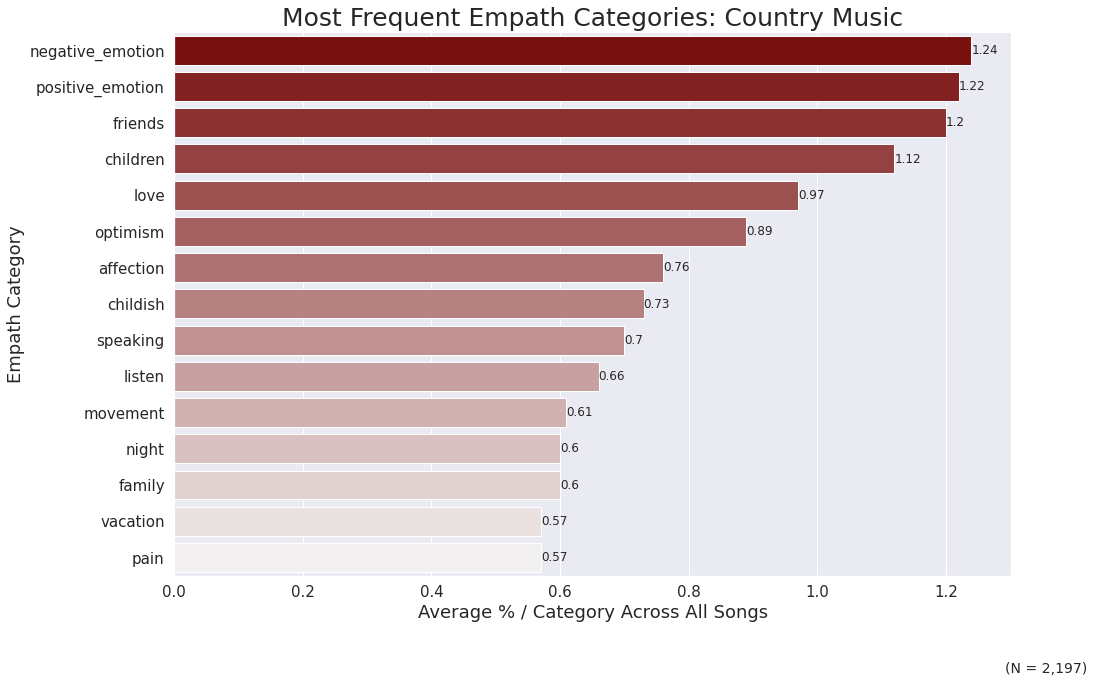

In [26]:
# apply the function to make the country plot
plot_top_categories(input_df_f = long_df, 
                    genre_f = 'Country',
                    color_f = 'darkred',
                    x_axis_label_f = 'Average % / Category Across All Songs',
                    y_axis_label_f = 'Empath Category',
                    title_f = 'Most Frequent Empath Categories: Country Music',
                    sample_size_f = '2,197'#,
                    # optional arguments to save out image
                    # need to define plot_out_dir as directory
                    # where the image will be saved
                    # plot_out_dir_f = plot_out_dir,
                    # image_file_title_f = 'country_most_frequent_empath'
                   )

(388, 3)
(194, 3)


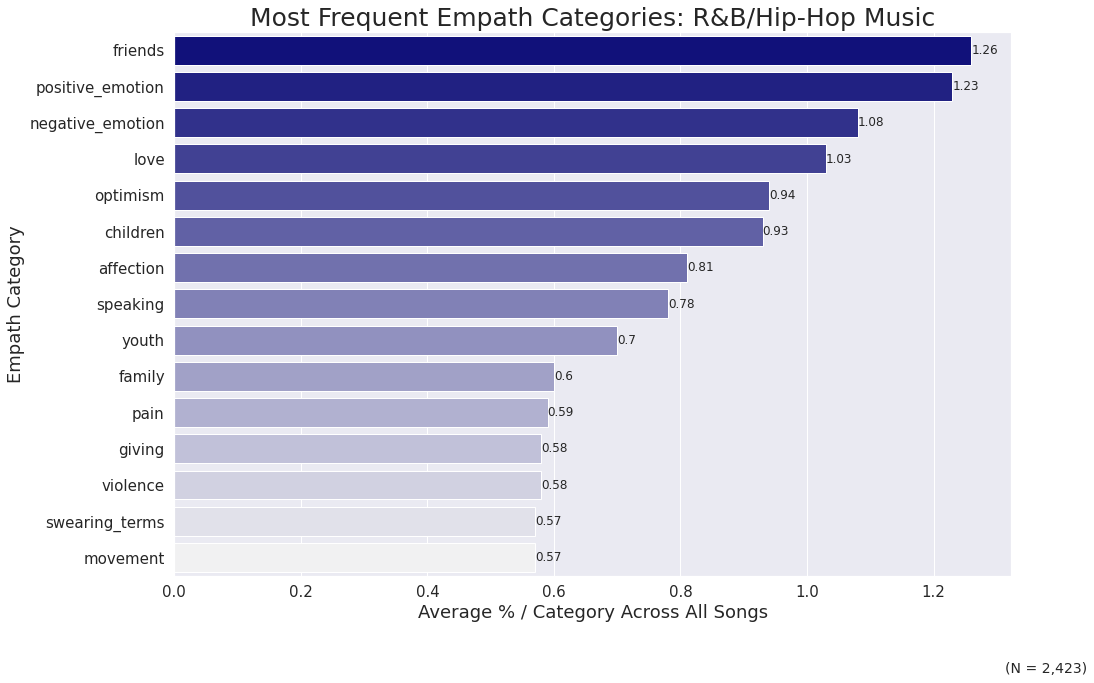

In [27]:
# apply the function to make the R&B/hip-hop plot
plot_top_categories(input_df_f = long_df, 
                    genre_f = 'R&B/Hip-Hop',
                    color_f = 'darkblue',
                    x_axis_label_f = 'Average % / Category Across All Songs',
                    y_axis_label_f = 'Empath Category',
                    title_f = 'Most Frequent Empath Categories: R&B/Hip-Hop Music',
                    sample_size_f = '2,423'# ,
                    # optional arguments to save out image
                    # need to define plot_out_dir as directory
                    # where the image will be saved
                    # plot_out_dir_f = plot_out_dir,
                    # image_file_title_f = 'rbhh_most_frequent_empath'
                   )

## Largest Differences Between Country and R&B/Hip-Hop Music

### Data Preparation

In [28]:
# create a difference score for rbhh minus country for each theme
long_df['diff_rbhh_country'] =  long_df.groupby(['variable'])['value'].diff().bfill() 

In [29]:
long_df.head()

,genre,variable,value,diff_rbhh_country
0,Country,help,0.12,0.01
1,R&B/Hip-Hop,help,0.13,0.01
2,Country,office,0.06,-0.02
3,R&B/Hip-Hop,office,0.04,-0.02
4,Country,dance,0.32,-0.11


In [30]:
top_neg_diff = long_df[['variable', 'diff_rbhh_country']].drop_duplicates().sort_values(by = 'diff_rbhh_country')[0:15]

In [31]:
top_neg_diff.head()

,variable,diff_rbhh_country
316,shape_and_size,-0.35
86,night,-0.33
126,childish,-0.32
122,driving,-0.27
308,car,-0.26


In [32]:
top_pos_diff = long_df[['variable', 'diff_rbhh_country']].drop_duplicates().sort_values(by = 'diff_rbhh_country', ascending = False)[-0:15]

In [33]:
top_pos_diff.head()

,variable,diff_rbhh_country
56,swearing_terms,0.43
376,giving,0.20
274,youth,0.14
120,business,0.13
178,violence,0.12


In [34]:
# concatenate above dataframes with top positive/negative scores
top_pos_neg_df = pd.concat([top_pos_diff, top_neg_diff], axis = 0).reset_index(drop = True)
top_pos_neg_df.shape

(30, 2)

In [35]:
top_pos_neg_df

,variable,diff_rbhh_country
0,swearing_terms,0.43
1,giving,0.20
2,youth,0.14
3,business,0.13
4,violence,0.12
5,speaking,0.08
6,communication,0.08
7,valuable,0.07
8,banking,0.07
9,friends,0.06


### Plotting Between-Genre Differences

In [36]:
# define the color palette for country 
country_pal = sns.light_palette('darkred', n_colors = 15, reverse = False)  
country_pal

[(0.9522631725304654, 0.9411074647169233, 0.940983750900324),
 (0.9235221042964811, 0.8746763495604346, 0.8745613684838306),
 (0.8947810360624966, 0.8082452344039459, 0.8081389860673371),
 (0.8660399678285122, 0.7418141192474572, 0.7417166036508437),
 (0.8357021735815287, 0.6716923865822747, 0.6716040888778784),
 (0.8069611053475443, 0.6052612714257859, 0.6051817064613849),
 (0.7782200371135598, 0.5388301562692972, 0.5387593240448914),
 (0.7478822428665762, 0.46870842360411474, 0.4686468092719261),
 (0.7191411746325919, 0.4022773084476261, 0.4022244268554327),
 (0.6904001063986074, 0.3358461932911374, 0.33580204443893924),
 (0.661659038164623, 0.2694150781346486, 0.2693796620224457),
 (0.6313212439176394, 0.1992933454694661, 0.19926714724948036),
 (0.6025801756836551, 0.1328622303129775, 0.13284476483298702),
 (0.5738391074496707, 0.0664311151564887, 0.06642238241649345),
 (0.5450980392156862, 0.0, 0.0)]

In [37]:
# define the color palette for R&B/hip-hop  
rbhh_pal = sns.light_palette('darkblue', n_colors = 15, reverse = True)  
rbhh_pal

[(0.0, 0.0, 0.5450980392156862),
 (0.06655018360621774, 0.06655238010300657, 0.573820200828308),
 (0.13310036721243548, 0.13310476020601314, 0.6025423624409297),
 (0.1996505508186532, 0.1996571403090197, 0.6312645240535515),
 (0.2698979668474386, 0.2699068748621933, 0.661582361311319),
 (0.33644815045365634, 0.33645925496519985, 0.6903045229239407),
 (0.40299833405987406, 0.4030116350682064, 0.7190266845365625),
 (0.47324575008865943, 0.47326136962138005, 0.7493445217943299),
 (0.5397959336948772, 0.5398137497243866, 0.7780666834069516),
 (0.6063461173010949, 0.6063661298273931, 0.8067888450195734),
 (0.6728963009073127, 0.6729185099303997, 0.8355110066321951),
 (0.743143716936098, 0.7431682444835733, 0.8658288438899626),
 (0.8096939005423157, 0.8097206245865799, 0.8945510055025843),
 (0.8762440841485336, 0.8762730046895865, 0.9232731671152061),
 (0.9427942677547513, 0.942825384792593, 0.9519953287278279)]

Text(0.13, 0.05, 'Used More in \n Country')

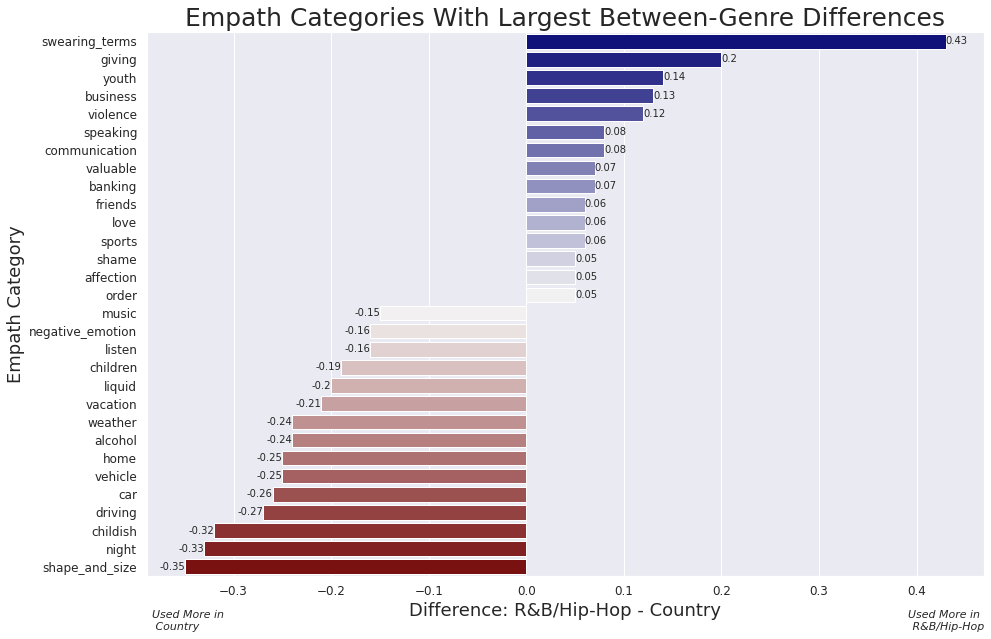

In [38]:
# define the color palette for country 
country_pal = sns.light_palette('darkred', n_colors = 15, reverse = False)  
# define the color palette for R&B/hip-hop  
rbhh_pal = sns.light_palette('darkblue', n_colors = 15, reverse = True)  
# make the basic barplot object, using above-defined color palettes
ax = sns.barplot(y="variable", 
                 x="diff_rbhh_country", 
                 data=top_pos_neg_df.sort_values(by = 'diff_rbhh_country', 
                                                 ascending = False ),
                palette = rbhh_pal + country_pal)
# add the value labels for each bar
ax.bar_label(ax.containers[0], fontsize = 10)
# set the x axis label 
ax.set(xlabel='Difference: R&B/Hip-Hop - Country')  
# set the y axis label 
ax.set(ylabel='Empath Category')
# set the chart title
ax.set_title("Empath Categories With Largest Between-Genre Differences", fontsize = 25)
# set the font size for the x and y axis labels
ax.xaxis.get_label().set_fontsize(18) 
ax.yaxis.get_label().set_fontsize(18)
# set the size of the ticks for each axis 
# (in particular the words on the y axis)
ax.tick_params(labelsize=12)
# set the figure subtitles - give context as to what
# positive & negative scores mean
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figtext.html
plt.figtext(0.90, 0.05, 'Used More in \n R&B/Hip-Hop', 
            horizontalalignment='right', 
            fontstyle = 'italic', 
            fontsize = 11) 
plt.figtext(0.13, 0.05, 'Used More in \n Country', 
            horizontalalignment='left', 
            fontstyle = 'italic', 
            fontsize = 11)
# to save the image to a file
# need to define plot_out_dir
# as directory where image will be saved
# fig = ax.get_figure()
# fig.savefig(plot_out_dir + "bw_genre_diff_gradient.png", dpi=250, bbox_inches = "tight") 

## Visualizing Empath Category Differences With Scattertext 
### https://github.com/JasonKessler/scattertext#visualizing-empath-topics-and-categories

In [39]:
import scattertext as st

In [40]:
feat_builder = st.FeatsFromOnlyEmpath()

In [41]:
%%time
empath_corpus = st.CorpusFromParsedDocuments(clean_df,
                                            category_col='genre',
                                            feats_from_spacy_doc=feat_builder,
                                            parsed_col='lyrics_clean').build()

CPU times: user 37.6 s, sys: 7.53 ms, total: 37.6 s
Wall time: 37.6 s


In [42]:
html = st.produce_scattertext_explorer(empath_corpus,
                                        category='R&B/Hip-Hop',
                                        category_name='R&B/Hip-Hop',
                                        not_category_name='Country',
                                        width_in_pixels=1000,
                                        metadata=clean_df['song'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())
open("rbhh-country-empath.html", 'wb').write(html.encode('utf-8'))

13539942